# Linear Regression Model

In [1]:
#find working dir
import os
os.getcwd()

'E:\\Machine_learning_with_python'

In [2]:
import pandas as pd

df = pd.read_excel('Apartment_Price.xlsx')

In [3]:
df

,area,rent
0,1700,18000
1,2000,30000
2,2500,41050
3,2250,36100
4,3000,52100
5,1900,32500
6,1500,20000
7,1850,24500
8,2700,48000
9,2100,31000


In [4]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [5]:
df.shape # 29 rows, 2 columns

(30, 2)

In [6]:
df.head()

,area,rent
0,1700,18000
1,2000,30000
2,2500,41050
3,2250,36100
4,3000,52100


In [7]:
df.area.head() # default first 5 data show  

0    1700
1    2000
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [8]:
df['area'].head() # another way

0    1700
1    2000
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [9]:
df.tail()

,area,rent
25,3100,53000
26,2750,48000
27,1800,25000
28,2200,31460
29,2100,31000


In [10]:
df.area.tail()

25    3100
26    2750
27    1800
28    2200
29    2100
Name: area, dtype: int64

# Data Visualization

In [11]:
import matplotlib.pyplot as plt
import numpy as np

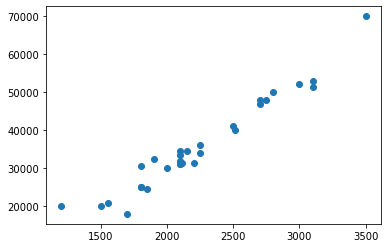

In [12]:
plt.scatter(df.area, df.rent)

Text(0.5, 1.0, 'House Rent')

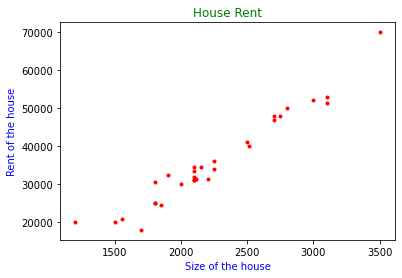

In [13]:
plt.scatter(df['area'], df['rent'], color='red', marker='.') # another way to show the data
plt.xlabel('Size of the house', color='blue')
plt.ylabel('Rent of the house', color='blue')
plt.title('House Rent', color='green')
#plt.savefig('rent.png')

# Seperate Train and Test data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x = df[['area']] # 2d array because of single feature
y = df['rent'] # 1d array


In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.30) # train_size = .70

In [17]:
xtrain.shape

(21, 1)

In [18]:
print(type(xtrain))

<class 'pandas.core.frame.DataFrame'>


In [19]:
ytrain.shape

(21,)

In [20]:
xtest.shape

(9, 1)

In [21]:
ytest.shape

(9,)

# Linear Regression model

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(xtrain, ytrain) #training

LinearRegression()

# Y = M * X + C

In [25]:
m = reg.coef_ # slope -> M

In [26]:
c = reg.intercept_ # intercept -> C

In [27]:
reg.predict([[4000]])

array([77741.79878109])

In [28]:
y = m * 4000 + c # Proof

In [29]:
y

array([77741.79878109])

In [30]:
df['output'] = reg.predict(x)
df

,area,rent,output
0,1700,18000,22637.202731
1,2000,30000,29824.758738
2,2500,41050,41804.018749
3,2250,36100,35814.388743
4,3000,52100,53783.278759
5,1900,32500,27428.906736
6,1500,20000,17845.498727
7,1850,24500,26230.980735
8,2700,48000,46595.722753
9,2100,31000,32220.610740


# Best Fit Line

### Example 1: Best fit line with full data set

Text(0.5, 1.0, 'House Rent')

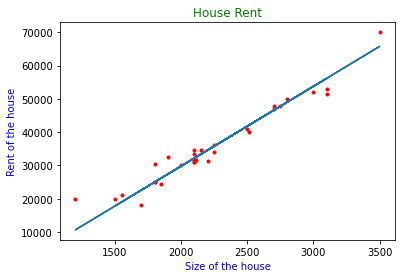

In [31]:
plt.plot(df.area, df.output)
plt.scatter(df.area, df.rent, color='red', marker='.')
plt.xlabel('Size of the house', color='blue')
plt.ylabel('Rent of the house', color='blue')
plt.title('House Rent', color='green')


### Example 2: Best fit line with train data set only

Text(0.5, 1.0, 'House Rent')

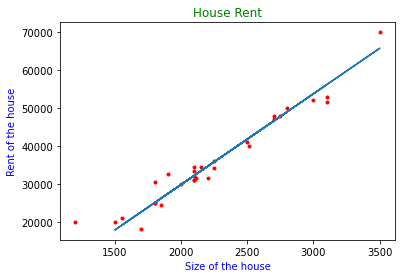

In [32]:
plt.plot(xtrain, reg.predict(xtrain))
# plt.scatter(df.area, df.rent, color='red', marker='.')
plt.scatter(df['area'], df['rent'] , color='red', marker='.') # another way to show the data visualization 
plt.xlabel('Size of the house', color='blue')
plt.ylabel('Rent of the house', color='blue')
plt.title('House Rent', color='green')

### Best Fit line with Test data set only

Text(0.5, 1.0, 'House Rent')

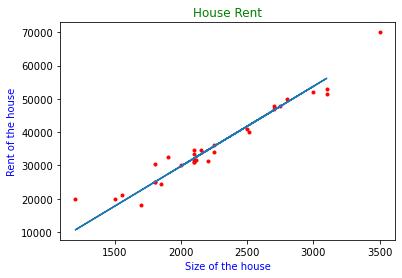

In [33]:
plt.plot(xtest, reg.predict(xtest))
plt.scatter(df['area'], df['rent'], color='red', marker='.') 
plt.xlabel('Size of the house', color='blue')
plt.ylabel('Rent of the house', color='blue')
plt.title('House Rent', color='green')

In [34]:
reg.score(xtest, ytest) # r squarred value

0.8628695668523962

In [35]:
reg.score(xtrain, ytrain)

0.9615902609902367

# Cost Function

In [36]:
# MSE (Mean Squared Error)
from sklearn.metrics import mean_squared_error

In [37]:
pred = reg.predict(xtest) # ytest -> y
pred

array([27428.90673574, 47793.6487541 , 32220.61074006, 56179.13076165,
       33418.53674114, 10657.94272063, 34616.46274222, 29824.7587379 ,
       53783.27875949])

In [39]:
mse = mean_squared_error(ytest, pred) # observed value, predicted value
mse

15419251.991787098

In [ ]:
# MAE (Mean Absolute Error)
from sklearn.metrics import mean_absolute